In [1]:
using Distributions, Gadfly

include("src/model.jl");
include("src/utils.jl");
include("src/mcmc.jl");
include("src/plotting.jl");

In [2]:
N = 100;
realmu = 10.0;
realphi = 2.0;
realxi = .3;

In [3]:
data = rand(GeneralizedExtremeValue(realmu, exp(realphi), realxi), N);

In [4]:
m = findMode(θ -> logposterior(θ, data), [0.0, 0.0, 0.0]);

In [5]:
s² = fisherVar(θ -> logposterior(θ, data), m);

In [6]:
approxMarginals = [
    Normal(m[1], sqrt(s²[1, 1])),
    Normal(m[2], sqrt(s²[2, 2])),
    Normal(m[3], sqrt(s²[3, 3])),    
];

In [9]:
niter = 100000;
δ = [10, .15, .1];
y0 = [0.0, 0.0, 0.0];

θ = mcmc(niter, δ, y0, data);

Taux d'acceptation (%) : [27.114271142711427, 23.693236932369324, 27.88427884278843]


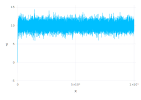

In [10]:
plot(x=1:niter, y=θ[1, :], Geom.line)

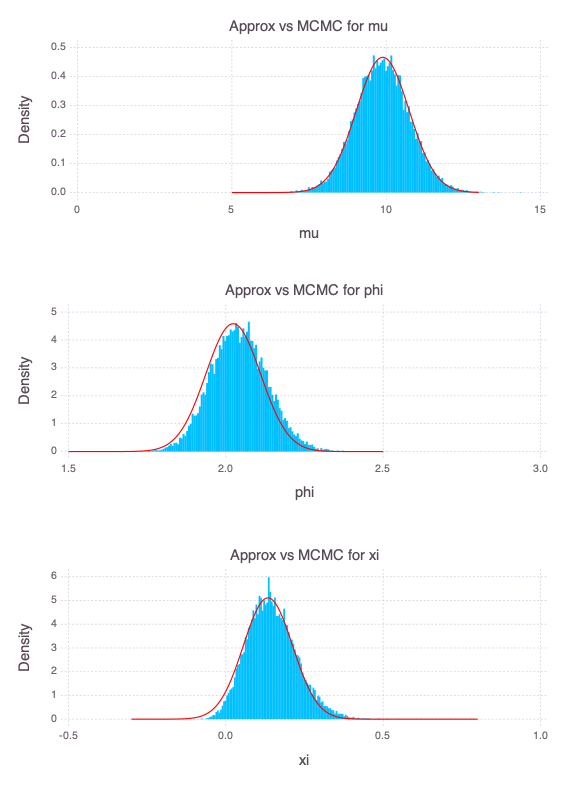

In [11]:
plotApproxVSMCMC(approxMarginals, θ, 1000)